# Hand written Numbers Identification using CNN

In [36]:
#importing package
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, Dropout


#### Load and preprocess the data

In [2]:
# loading fashin minst data

In [3]:

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 26s 2us/step


Normalize the data to be only between 0 and 1

In [30]:
# function to normalize the data
def scale_data(train_images, test_images):
    train_images = train_images/255
    test_images = test_images/255
    return (train_images, test_images)
    

In [32]:
scaled_train_images, scaled_test_images = scale_data(train_images, test_images)

In [33]:
# optimize the dimension 
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

In [37]:
# function to create the model 
# def get_model(input_shape):
#     model = Sequential([
#         Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1), padding='SAME'),
#         MaxPooling2D((2,2)),
#         Flatten(),
#         Dense(10, activation='softmax')
#     ])
#     return model


def get_model(input_shape):
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='SAME'),
        Conv2D(32, (3, 3), activation='relu', padding='SAME'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='SAME'),
        Conv2D(64, (3, 3), activation='relu', padding='SAME'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu', padding='SAME'),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Flatten(),
        
        # Dense Layers
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [38]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

#### Compile the model



In [41]:
# function to compile the model
def compile_model(model):
    return model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    

In [42]:
compile_model(model)

#### Fit the model to the training data


In [43]:
# train the model
def train_model(model, scaled_train_images, train_labels):
    history = model.fit(scaled_train_images, train_labels, epochs=10)
    return history
    

In [44]:

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/10


2024-03-25 16:19:24.916854: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 78s 41ms/step - loss: 0.2671 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0858 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0691 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0585 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0517 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0474 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0426 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0416 - accuracy: 0.9880
Epoch 9/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0408 - accuracy: 0.9886
Epoch 10/10
1875/1875 [==============================] - 82s 44ms/step - lo

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


In [20]:
# Change history into pandas dataframe
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

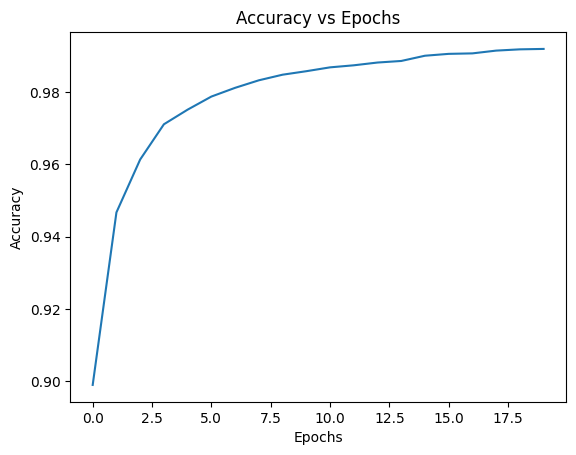

In [21]:
# Accuracy vs Epochs plot
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

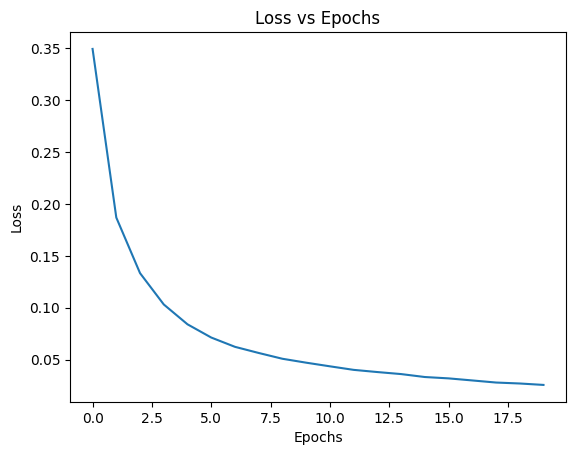

In [22]:
# Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

In [24]:
# Function Evaluate the model
def evaluate_model(model, scaled_test_images, test_labels):
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels)
    return (test_loss, test_accuracy)
    

In [25]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

 25/313 [=>............................] - ETA: 0s - loss: 0.0619 - accuracy: 0.9825 

2024-03-25 15:55:47.103212: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9795
Test loss: 0.0709160715341568
Test accuracy: 0.9794999957084656


#### Model predictions


1/1 [==============================] - 0s 49ms/step


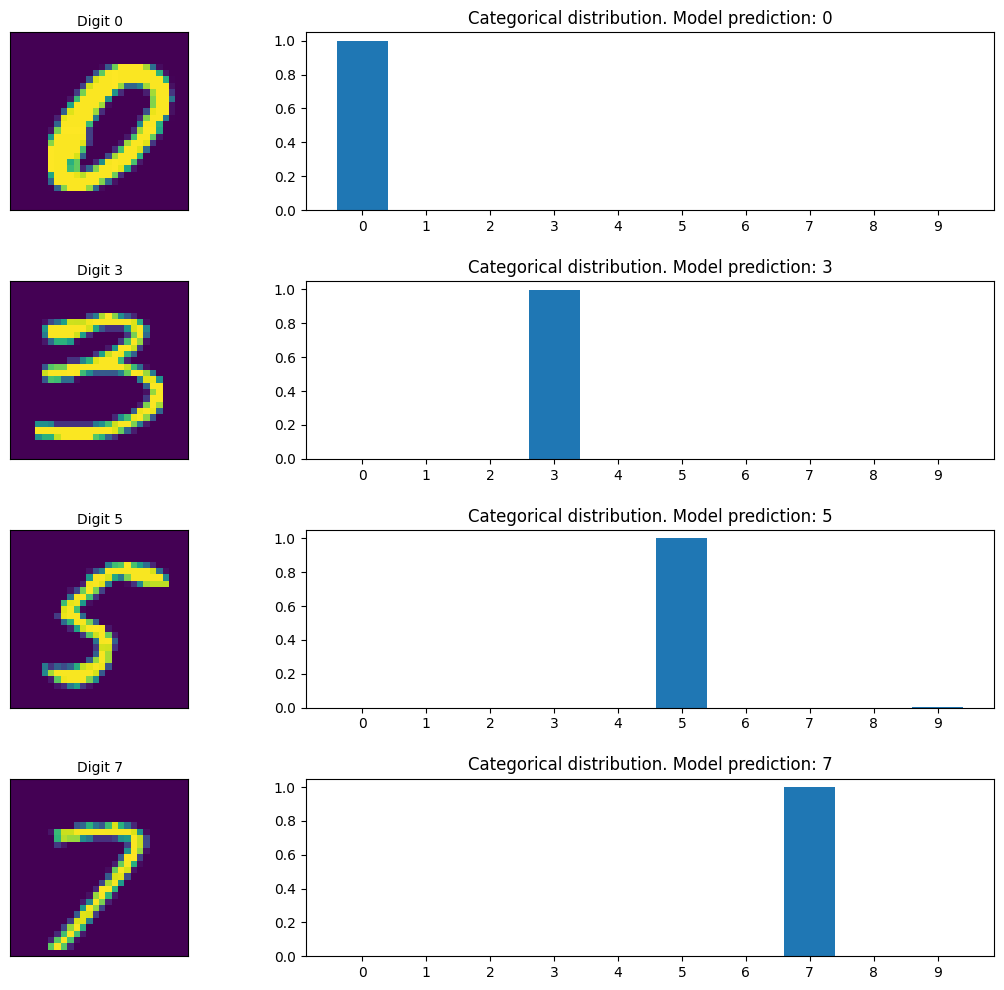

In [26]:
# Get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

### Export and save the model

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()



INFO:tensorflow:Assets written to: /tmp/tmpcsld46m9/assets


INFO:tensorflow:Assets written to: /tmp/tmpcsld46m9/assets
2024-03-25 16:51:29.752093: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-25 16:51:29.752136: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-25 16:51:29.752504: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpcsld46m9
2024-03-25 16:51:29.755115: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-25 16:51:29.755154: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpcsld46m9
2024-03-25 16:51:29.759404: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-03-25 16:51:29.761151: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-25 16:51:29.824933: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

In [46]:
# Save the TFLite model to disk
with open('model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)